# source 

## xgboost

- https://apple-rbox.tistory.com/6
- https://brunch.co.kr/@snobberys/137


## lightgbm

- https://ko.raw3h.net/page/what-is-lightgbm-how-to-implement-it-how-to-fine-tune-the-parameters-5295f7/


## etc

- https://www.kaggle.com/shep312/applying-lightgbm-to-titanic-dataset
- https://www.kaggle.com/suniliitb96/titanic-survival-prediction-using-xgboost


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix

In [2]:
def metrics(y_test, pred):
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    print('ACU : {0:.2f}, PRE : {1:.2f}, REC : {2:.2f}'.format(accuracy, precision, recall))
    print('f1-score : {0:.2f}, auc : {1:.2f}'.format(f1, roc_score))

In [3]:
data = load_breast_cancer()

cancer = pd.DataFrame(data.data, columns = data.feature_names)
cancer['target'] = data.target
cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
cancer['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [5]:
y = cancer['target']
X = cancer.drop('target', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


In [6]:
xgb = XGBClassifier(n_estimators=500, learning_rate = 0.1, max_depth = 4)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

In [7]:
metrics(y_test, xgb_pred)

ACU : 0.99, PRE : 0.99, REC : 1.00
f1-score : 0.99, auc : 0.99


In [8]:
data = pd.read_csv('C:\\Users\박선희\\Xgboost\\Datas\\titanic\\train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
data['Embarked'].fillna('S', inplace = True)
data['Fare'].fillna(0, inplace=True)
data['Initial'] = data['Name'].str.extract('([A-Za-z]+)\.')
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Other'],inplace=True)


In [10]:

mapping = {
    "Mr":0,
    "Miss":1,
    "Mrs" : 1,
    "Master":2,
    "Other":3
}



mapping_sex = {
    'male' : 0,
    'female': 1
}

mapping_em = {
    'S' :0,
    'C' :1,
    'Q' :2
}


In [11]:

data['Initial'] = data['Initial'].map(mapping)
data['Fare'] = data['Fare'].map(lambda x : np.log(x) if x > 0 else 0)
data['Sex'] = data['Sex'].map(mapping_sex)
data['Embarked'] = data['Embarked'].map(mapping_em)


In [12]:
data.drop(['PassengerId', "Ticket", "Cabin", "Name"], axis = 1, inplace = True)

data.loc[ (data['Age'].isnull()) & (data['Initial'] == 0), 'Age' ] = 32
data.loc[ (data['Age'].isnull()) & (data['Initial'] == 1), 'Age' ] = 28
data.loc[ (data['Age'].isnull()) & (data['Initial'] == 2), 'Age' ] = 5
data.loc[ (data['Age'].isnull()) & (data['Initial'] == 3), 'Age' ] = 45

In [13]:
y = data['Survived']
X = data.drop('Survived', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)

In [14]:
xgb = XGBClassifier()

xgb_param_grid = {
    'n_estimators' : [100, 200, 400, 600],
    'learning_rate' : [0.01, 0.05, 0.1, 0.15, 0.2],
    'max_depth' : [4, 6, 8, 10, 12],
}

xgb_grid = GridSearchCV(xgb, param_grid = xgb_param_grid, scoring="accuracy", n_jobs= -1, verbose = 1)
xgb_grid.fit(X_train, y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                

In [15]:
print("ACU : {0:.4f}".format(xgb_grid.best_score_))
print("PARAM : ", xgb_grid.best_params_)

ACU : 0.8357
PARAM :  {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 600}


In [16]:
result = pd.DataFrame(xgb_grid.cv_results_)
result.sort_values(by=['rank_test_score'], inplace=True)

In [17]:
result[['params', 'mean_test_score', 'rank_test_score']].head(10)

,params,mean_test_score,rank_test_score
3,"{'learning_rate': 0.01, 'max_depth': 4, 'n_est...",0.835664,1
20,"{'learning_rate': 0.05, 'max_depth': 4, 'n_est...",0.828622,2
6,"{'learning_rate': 0.01, 'max_depth': 6, 'n_est...",0.825845,3
1,"{'learning_rate': 0.01, 'max_depth': 4, 'n_est...",0.824436,4
5,"{'learning_rate': 0.01, 'max_depth': 6, 'n_est...",0.821639,5
40,"{'learning_rate': 0.1, 'max_depth': 4, 'n_esti...",0.820221,6
21,"{'learning_rate': 0.05, 'max_depth': 4, 'n_est...",0.820211,7
10,"{'learning_rate': 0.01, 'max_depth': 8, 'n_est...",0.817453,8
24,"{'learning_rate': 0.05, 'max_depth': 6, 'n_est...",0.816025,9
11,"{'learning_rate': 0.01, 'max_depth': 8, 'n_est...",0.816005,10


In [18]:
xgb = XGBClassifier(n_estimators=400, learning_rate = 0.1, max_depth = 3)
evals = [(X_test, y_test)]
xgb.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric = "logloss", eval_set = evals, verbose = 1)

[0]	validation_0-logloss:0.64324
[1]	validation_0-logloss:0.60054
[2]	validation_0-logloss:0.56728
[3]	validation_0-logloss:0.53962
[4]	validation_0-logloss:0.51578
[5]	validation_0-logloss:0.49308
[6]	validation_0-logloss:0.47552
[7]	validation_0-logloss:0.46041
[8]	validation_0-logloss:0.44788
[9]	validation_0-logloss:0.43425
[10]	validation_0-logloss:0.42489
[11]	validation_0-logloss:0.41704
[12]	validation_0-logloss:0.41052
[13]	validation_0-logloss:0.40404
[14]	validation_0-logloss:0.39943
[15]	validation_0-logloss:0.39399
[16]	validation_0-logloss:0.39069
[17]	validation_0-logloss:0.38691
[18]	validation_0-logloss:0.38319
[19]	validation_0-logloss:0.37907
[20]	validation_0-logloss:0.37577
[21]	validation_0-logloss:0.37422
[22]	validation_0-logloss:0.37279
[23]	validation_0-logloss:0.37334
[24]	validation_0-logloss:0.37053
[25]	validation_0-logloss:0.36952
[26]	validation_0-logloss:0.36909
[27]	validation_0-logloss:0.36907
[28]	validation_0-logloss:0.36729
[29]	validation_0-loglos

D:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
D:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[148]	validation_0-logloss:0.35805
[149]	validation_0-logloss:0.35899
[150]	validation_0-logloss:0.35882
[151]	validation_0-logloss:0.35790
[152]	validation_0-logloss:0.35815
[153]	validation_0-logloss:0.35742
[154]	validation_0-logloss:0.35937
[155]	validation_0-logloss:0.35878
[156]	validation_0-logloss:0.35819
[157]	validation_0-logloss:0.35770
[158]	validation_0-logloss:0.35849
[159]	validation_0-logloss:0.35863
[160]	validation_0-logloss:0.35822
[161]	validation_0-logloss:0.35859
[162]	validation_0-logloss:0.35868
[163]	validation_0-logloss:0.35873
[164]	validation_0-logloss:0.35900
[165]	validation_0-logloss:0.35920
[166]	validation_0-logloss:0.35836
[167]	validation_0-logloss:0.35901
[168]	validation_0-logloss:0.35889
[169]	validation_0-logloss:0.35787
[170]	validation_0-logloss:0.35791


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=400,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [19]:
xgb = XGBClassifier(n_estimators=400, learning_rate = 0.1, max_depth = 3)
evals = [(X_test, y_test)]
xgb.fit(X_train, y_train, early_stopping_rounds = 3, eval_metric = "logloss", eval_set = evals, verbose = 1)

[0]	validation_0-logloss:0.64324
[1]	validation_0-logloss:0.60054
[2]	validation_0-logloss:0.56728
[3]	validation_0-logloss:0.53962
[4]	validation_0-logloss:0.51578
[5]	validation_0-logloss:0.49308
[6]	validation_0-logloss:0.47552
[7]	validation_0-logloss:0.46041
[8]	validation_0-logloss:0.44788
[9]	validation_0-logloss:0.43425
[10]	validation_0-logloss:0.42489
[11]	validation_0-logloss:0.41704
[12]	validation_0-logloss:0.41052
[13]	validation_0-logloss:0.40404
[14]	validation_0-logloss:0.39943
[15]	validation_0-logloss:0.39399
[16]	validation_0-logloss:0.39069
[17]	validation_0-logloss:0.38691
[18]	validation_0-logloss:0.38319
[19]	validation_0-logloss:0.37907
[20]	validation_0-logloss:0.37577
[21]	validation_0-logloss:0.37422
[22]	validation_0-logloss:0.37279
[23]	validation_0-logloss:0.37334
[24]	validation_0-logloss:0.37053
[25]	validation_0-logloss:0.36952
[26]	validation_0-logloss:0.36909
[27]	validation_0-logloss:0.36907
[28]	validation_0-logloss:0.36729
[29]	validation_0-loglos

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=400,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

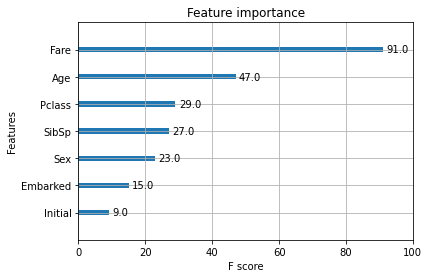

In [20]:
fig, ax = plt.subplots()
plot_importance(xgb, ax=ax)

In [21]:
from lightgbm import LGBMClassifier, plot_importance

ModuleNotFoundError: No module named 'lightgbm'

In [11]:
lgb = LGBMClassifier(n_estimaotrs = 400)
lgb.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimaotrs=400, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [12]:
lgb_pred = lgb.predict(X_test)
metrics(y_test, lgb_pred)

ACU : 0.84, PRE : 0.79, REC : 0.73
f1-score : 0.76, auc : 0.81


In [13]:
lgb = LGBMClassifier(n_estimaotrs = 400)
evals = [(X_test, y_test)]
lgb.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric = "logloss", eval_set = evals, verbose = True)

[1]	valid_0's binary_logloss: 0.605701
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.569461
[3]	valid_0's binary_logloss: 0.540251
[4]	valid_0's binary_logloss: 0.5147
[5]	valid_0's binary_logloss: 0.493662
[6]	valid_0's binary_logloss: 0.47569
[7]	valid_0's binary_logloss: 0.45573
[8]	valid_0's binary_logloss: 0.442288
[9]	valid_0's binary_logloss: 0.427343
[10]	valid_0's binary_logloss: 0.41478
[11]	valid_0's binary_logloss: 0.404568
[12]	valid_0's binary_logloss: 0.394087
[13]	valid_0's binary_logloss: 0.384579
[14]	valid_0's binary_logloss: 0.377022
[15]	valid_0's binary_logloss: 0.372698
[16]	valid_0's binary_logloss: 0.367266
[17]	valid_0's binary_logloss: 0.364566
[18]	valid_0's binary_logloss: 0.362322
[19]	valid_0's binary_logloss: 0.35638
[20]	valid_0's binary_logloss: 0.352956
[21]	valid_0's binary_logloss: 0.351149
[22]	valid_0's binary_logloss: 0.350341
[23]	valid_0's binary_logloss: 0.348923
[24]	valid_0's binary_logloss: 0.

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimaotrs=400, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

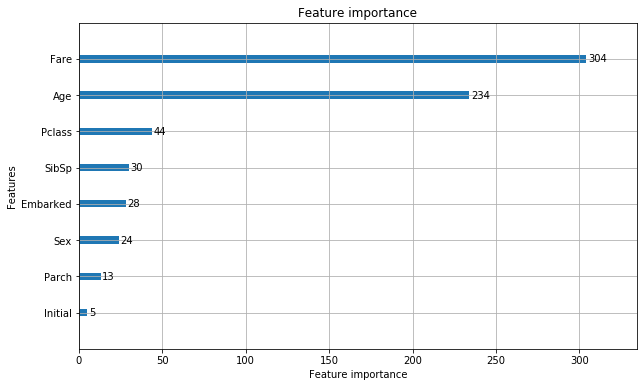

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_importance(lgb, ax = ax)